In [1]:
import arcgis, datetime
from getpass import getpass

In [2]:
gis = arcgis.gis.GIS("https://www.arcgis.com", "ScottMoorePNW", getpass())

········


In [3]:
items = gis.content.search(query="title:WildlifeObservations_ScottMoorePNW", item_type="Feature Layer")

In [4]:
items

[<Item title:"WildlifeObservation_ScottMoorePNW" type:Feature Layer Collection owner:ScottMoorePNW>,
 <Item title:"WildlifeObservation_ScottMoorePNW_Sum_20180213_085005" type:Feature Layer Collection owner:ScottMoorePNW>,
 <Item title:"WildlifeObservation_ScottMoorePNW_Thurston" type:Feature Layer Collection owner:ScottMoorePNW>]

In [5]:
item = items[0]

<Item title:"WildlifeObservation_ScottMoorePNW" type:Feature Layer Collection owner:ScottMoorePNW>
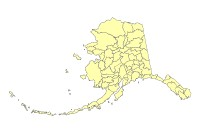

In [6]:
item

In [7]:
lyr = item.layers[0]

In [8]:
fset = lyr.query(where="last_edited_date IS NOT NULL", out_fields="OBJECTID,last_edited_date,DaysSinceObs", return_geometry=False)

In [9]:
features = fset.features

In [10]:
features

[{"attributes": {"OBJECTID": 1, "last_edited_date": 1491594855455, "DaysSinceObs": 43}},
 {"attributes": {"OBJECTID": 2, "last_edited_date": 1494961221645, "DaysSinceObs": 4}},
 {"attributes": {"OBJECTID": 3, "last_edited_date": 1495263600000, "DaysSinceObs": null}},
 {"attributes": {"OBJECTID": 4, "last_edited_date": 1495263600000, "DaysSinceObs": null}}]

In [11]:
updates_list = []
to_date = datetime.datetime.today()
for feat in features:
    time = feat.get_value("last_edited_date")
    from_date = datetime.datetime.fromtimestamp(time / 1e3)
    delta = to_date - from_date
    num_days = delta.days
    feat.set_value("DaysSinceObs", num_days)
    updates_list.append(feat)

In [13]:
lyr.edit_features(updates=updates_list)

{'addResults': [],
 'deleteResults': [],
 'updateResults': [{'globalId': None, 'objectId': 1, 'success': True},
  {'globalId': None, 'objectId': 2, 'success': True},
  {'globalId': None, 'objectId': 3, 'success': True},
  {'globalId': None, 'objectId': 4, 'success': True}]}

In [12]:
updates_list

[{"attributes": {"OBJECTID": 1, "last_edited_date": 1491594855455, "DaysSinceObs": 314}},
 {"attributes": {"OBJECTID": 2, "last_edited_date": 1494961221645, "DaysSinceObs": 275}},
 {"attributes": {"OBJECTID": 3, "last_edited_date": 1495263600000, "DaysSinceObs": 271}},
 {"attributes": {"OBJECTID": 4, "last_edited_date": 1495263600000, "DaysSinceObs": 271}}]